Imports.

In [17]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from diffpy.utils.parsers.loaddata import loadData

Ensuring that data files are in place.

In [18]:
data_path = Path.cwd() / "data"
if not data_path.exists():
    data_path.mkdir()
    sys.exit(f"\n{80*'-'}\nA folder called '{data_path.name}' has been created."
             f"\nPlease place your data files there and rerun the cell."
             f"\n{80*'-'}")
data_files = list(data_path.glob("*.*"))
if len(data_files) == 0:
    sys.exit(f"\n{80*'-'}\nNo files were found in the '{data_path.name}' "
             f"folder.\nPlease place your data files there and rerun the cell."
             f"\n{80*'-'}")
s = f"The following files were found in the '{data_path.name}' folder:\n"
for i, e in enumerate(data_files):
    s += f"{i}\t{e.name}\n"
print(f"\n{80*'-'}\n{s}{80*'-'}")


--------------------------------------------------------------------------------
The following files were found in the 'data' folder:
0	00_B3_Bronze-3nm_DD155_0_115-118_sum_esd_norm.gr
1	01_B3_Bronze-3nm_DD155_1_139-142_sum_esd_norm.gr
2	02_B3_Bronze-3nm_DD155_2_163-166_sum_esd_norm.gr
3	03_B3_Bronze-3nm_DD155_3_187-190_sum_esd_norm.gr
4	04_B3_Bronze-3nm_DD155_4_211-214_sum_esd_norm.gr
5	05_B3_Bronze-3nm_DD155_5_235-238_sum_esd_norm.gr
6	06_B3_Bronze-3nm_DD155_6_259-262_sum_esd_norm.gr
7	07_B3_Bronze-3nm_DD155_7_283-286_sum_esd_norm.gr
8	08_B3_Bronze-3nm_DD155_8_307-310_sum_esd_norm.gr
9	09_B3_Bronze-3nm_DD155_9_331-334_sum_esd_norm.gr
10	10_B3_Bronze-3nm_DD155_10_355-358_sum_esd_norm.gr
11	11_B3_Bronze-3nm_DD155_11_379-382_sum_esd_norm.gr
12	12_B3_Bronze-3nm_DD155_12_403-406_sum_esd_norm.gr
13	13_B3_Bronze-3nm_DD155_13_427-430_sum_esd_norm.gr
14	14_B3_Bronze-3nm_DD155_14_451-454_sum_esd_norm.gr
15	15_B3_Bronze-3nm_DD155_15_475-478_sum_esd_norm.gr
16	16_B3_Bronze-3nm_DD155_16_499-502_

Loading data from files.

In [19]:
d = {}
print(f"\n{80*'-'}\nLoading data...")
for i, e in enumerate(data_files):
    print(f"\t{i}\t{e.name}")
    data = loadData(e)
    x, y = data[:, 0], data[:, 1]
    d[i] = dict(path=e, x=x, y=y)
    if i == 0:
        yarray = y
    else:
        yarray = np.column_stack((yarray, y))
print(f"Done loading data.\n{80*'-'}\n"
      f"xmin = {np.amin(x)}, xmax = {np.amax(x)}\n{80*'-'}\n"
      f"shape of stacked y-array: {yarray.shape}\n{80*'-'}")


--------------------------------------------------------------------------------
Loading data...
	0	00_B3_Bronze-3nm_DD155_0_115-118_sum_esd_norm.gr
	1	01_B3_Bronze-3nm_DD155_1_139-142_sum_esd_norm.gr
	2	02_B3_Bronze-3nm_DD155_2_163-166_sum_esd_norm.gr
	3	03_B3_Bronze-3nm_DD155_3_187-190_sum_esd_norm.gr
	4	04_B3_Bronze-3nm_DD155_4_211-214_sum_esd_norm.gr
	5	05_B3_Bronze-3nm_DD155_5_235-238_sum_esd_norm.gr
	6	06_B3_Bronze-3nm_DD155_6_259-262_sum_esd_norm.gr
	7	07_B3_Bronze-3nm_DD155_7_283-286_sum_esd_norm.gr
	8	08_B3_Bronze-3nm_DD155_8_307-310_sum_esd_norm.gr
	9	09_B3_Bronze-3nm_DD155_9_331-334_sum_esd_norm.gr
	10	10_B3_Bronze-3nm_DD155_10_355-358_sum_esd_norm.gr
	11	11_B3_Bronze-3nm_DD155_11_379-382_sum_esd_norm.gr
	12	12_B3_Bronze-3nm_DD155_12_403-406_sum_esd_norm.gr
	13	13_B3_Bronze-3nm_DD155_13_427-430_sum_esd_norm.gr
	14	14_B3_Bronze-3nm_DD155_14_451-454_sum_esd_norm.gr
	15	15_B3_Bronze-3nm_DD155_15_475-478_sum_esd_norm.gr
	16	16_B3_Bronze-3nm_DD155_16_499-502_sum_esd_norm.gr
	17	

Function to get index of value in array.

In [20]:
def get_idx(array, value):
    for i, e in enumerate(array):
        if e >= value:
            break
    
    return i

State minimum and maximum $x$-value to conduct analysis for.

In [21]:
xmin, xmax = 1, 30

Shaping $y$-array to conduct pca for.

In [22]:
idx_min, idx_max = get_idx(x, xmin), get_idx(x, xmax)
X = yarray[idx_min:idx_max, :].T
print(f"\n{80*'-'}\nshape of X (shaped yarray): {X.shape}\n{80*'-'}")


--------------------------------------------------------------------------------
shape of X (shaped yarray): (41, 2900)
--------------------------------------------------------------------------------


Plot function to plot reconstruction error.

In [23]:
def plot_evr(re, plot_paths):
    x = np.arange(1, len(re) + 1)
    xmin, xmax = np.amin(x), np.amax(x)
    xrange = xmax - xmin
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(x, re, "-o", c=colors[0])
    ax.set_xlabel(r"$n$", fontsize=20)
    ax.set_ylabel(r"$re$", fontsize=20)
    ax.tick_params(axis="both", which="both", labelsize=14)
    ax.set_xlim(xmin - 0.01 * xrange, xmax + 0.01 * xrange)
    ax.minorticks_on()
    
    for p in plot_paths:
        plt.savefig(p / f"re.{p.name}", bbox_inches="tight", dpi=300)
    plt.show()

    return None

Conducting nmf analysis for range of components.

In [24]:
n = np.arange(1, 11)
re = []
offset = np.amin(X)
if offset < 0:
    X = X - offset
print(f"\n{80*'-'}\nConducting nmf analysis for range of components...")
for i in n:
    print(f"\t{i}")
    nmf = NMF(n_components=i, init="nndsvdar", max_iter=10**3)
    nmf.fit(X.T)
    re.append(nmf.reconstruction_err_)
print(f"Done.\n{80*'-'}")


--------------------------------------------------------------------------------
Conducting nmf analysis for range of components...
	1


c:\Users\aaskovka\AppData\Local\miniconda3\envs\beamtime_env\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


	2


c:\Users\aaskovka\AppData\Local\miniconda3\envs\beamtime_env\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


	3


c:\Users\aaskovka\AppData\Local\miniconda3\envs\beamtime_env\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


	4


c:\Users\aaskovka\AppData\Local\miniconda3\envs\beamtime_env\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


	5


c:\Users\aaskovka\AppData\Local\miniconda3\envs\beamtime_env\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


	6


c:\Users\aaskovka\AppData\Local\miniconda3\envs\beamtime_env\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


	7


c:\Users\aaskovka\AppData\Local\miniconda3\envs\beamtime_env\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


	8


c:\Users\aaskovka\AppData\Local\miniconda3\envs\beamtime_env\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


	9


c:\Users\aaskovka\AppData\Local\miniconda3\envs\beamtime_env\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


	10


Plotting reconstruction error as a function of the number of components.


--------------------------------------------------------------------------------
Explained variance ratio as a function of number of components:


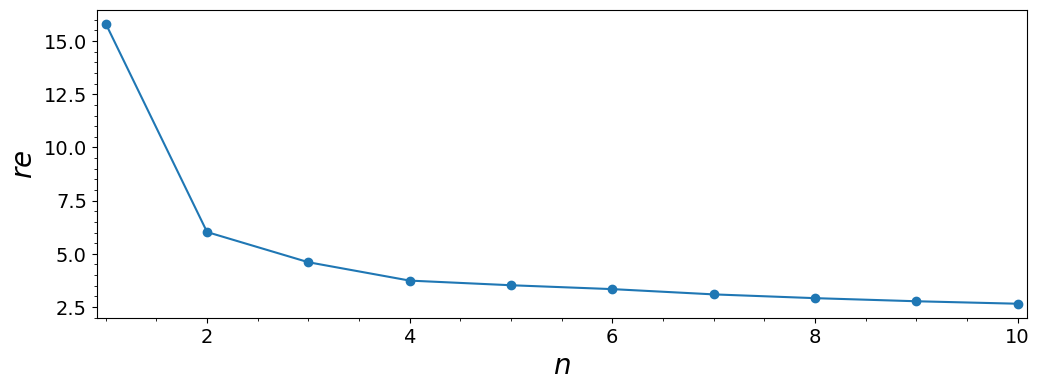

--------------------------------------------------------------------------------


In [26]:
plot_folders = ["png"]
plot_paths = [Path.cwd() / folder for folder in plot_folders]
for p in plot_paths:
    if not p.exists():
        p.mkdir()
print(f"\n{80*'-'}\nExplained variance ratio as a function of number of "
      f"components:")
plot_evr(re, plot_paths)
print(f"{80*'-'}")